In [1]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap5
Added /Users/jinceyang/Desktop/codebase/ml/learn_d2l to Python path


In [2]:
import importlib
from d2l.classification.model import MLPClassifierTorch, MLPClassifier
from d2l.classification.dataset import FashionMNISTDataset
from d2l.base.trainer import Trainer
from d2l.base.evaluator import ClassificationEvaluator
from d2l.base.optimizer import SGDOptimizer
from d2l.base.plot import plot_loss, show_images
from d2l.base.utils import mps
from typing import List
from matplotlib import pyplot as plt

In [3]:
import torch

In [4]:
rng = torch.Generator().manual_seed(42)

In [5]:
data = FashionMNISTDataset()
mlp_model_scratch = MLPClassifier(
    num_features=784, 
    num_outputs=10,
    num_hiddens=[256, 256],
    rng=rng
)
mlp_model = MLPClassifierTorch(
    num_features=784, 
    num_outputs=10, 
    num_hiddens=[256, 256],
    rng=rng
)

In [6]:
# Let's check the shape of the data
train_loader = data.get_train_dataloader(256)
for X, y in train_loader:
    print(f"Input shape: {X.shape}")
    print(f"Label shape: {y.shape}")
    break

Input shape: torch.Size([256, 1, 28, 28])
Label shape: torch.Size([256])


In [7]:
def on_epoch_end(model, epoch: int, losses: List[float]) -> None:
    avg_loss = sum(losses) / len(losses)
    print(f"Epoch {epoch + 1}, Average Loss: {avg_loss:.4f}")
    evaluator = ClassificationEvaluator(model)
    test_acc = evaluator.accuracy(data.get_test_dataloader(data.test_size))
    test_loss = evaluator.loss(data.get_test_dataloader(data.test_size))
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Epoch 1, Average Loss: 1.6977
Test Loss: 0.9879, Test Accuracy: 0.6249
Epoch 2, Average Loss: 0.8316
Test Loss: 0.7068, Test Accuracy: 0.7285
Epoch 3, Average Loss: 0.6522
Test Loss: 0.7106, Test Accuracy: 0.7194
Epoch 4, Average Loss: 0.5760
Test Loss: 0.5537, Test Accuracy: 0.8048
Epoch 5, Average Loss: 0.5237
Test Loss: 0.5465, Test Accuracy: 0.8014
Epoch 6, Average Loss: 0.4789
Test Loss: 0.5579, Test Accuracy: 0.7908
Epoch 7, Average Loss: 0.4561
Test Loss: 0.5145, Test Accuracy: 0.8124
Epoch 8, Average Loss: 0.4304
Test Loss: 0.4993, Test Accuracy: 0.8121
Epoch 9, Average Loss: 0.4106
Test Loss: 0.4821, Test Accuracy: 0.8235
Epoch 10, Average Loss: 0.3976
Test Loss: 0.4432, Test Accuracy: 0.8370
Epoch 1, Average Loss: 1.7113
Test Loss: 1.0176, Test Accuracy: 0.5987
Epoch 2, Average Loss: 0.8547
Test Loss: 0.7476, Test Accuracy: 0.7241
Epoch 3, Average Loss: 0.6501
Test Loss: 0.6404, Test Accuracy: 0.7728
Epoch 4, Average Loss: 0.5686
Test Loss: 0.6382, Test Accuracy: 0.7702
Epoch

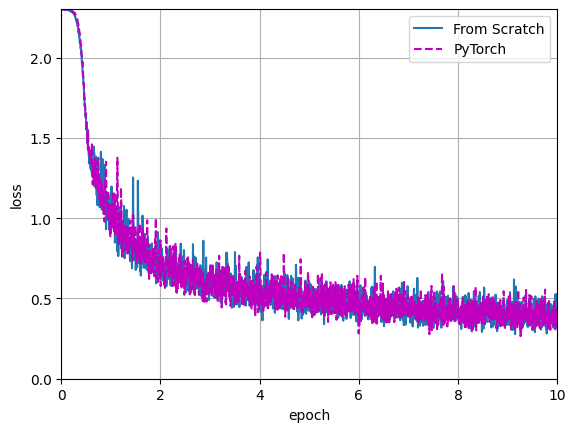

In [8]:
from d2l import plot_losses

trainer_scratch = Trainer(model=mlp_model_scratch, optimizer=SGDOptimizer(mlp_model_scratch.parameters(), lr=0.1), on_train_epoch_end=on_epoch_end)
all_epoch_losses_scratch = trainer_scratch.train(data.get_train_dataloader_epochs(256, 10))

trainer = Trainer(model=mlp_model, optimizer=torch.optim.SGD(mlp_model.parameters(), lr=0.1), on_train_epoch_end=on_epoch_end)
all_epoch_losses = trainer.train(data.get_train_dataloader_epochs(256, 10))

fig, ax = plt.subplots()
plot_losses(ax, 
            [all_epoch_losses_scratch, all_epoch_losses], 
            ['From Scratch', 'PyTorch'])

In [9]:
evaluator = ClassificationEvaluator(mlp_model)
test_loss = evaluator.loss(data.get_test_dataloader(data.test_size))
print(f'Test loss: {test_loss:.4f}')
accuracy = evaluator.accuracy(data.get_test_dataloader(data.test_size))
print(f'Test accuracy: {accuracy:.2%}')

evaluator_scratch = ClassificationEvaluator(mlp_model_scratch)
test_loss_scratch = evaluator_scratch.loss(data.get_test_dataloader(data.test_size))
print(f'Test loss (scratch): {test_loss_scratch:.4f}')
accuracy_scratch = evaluator_scratch.accuracy(data.get_test_dataloader(data.test_size))
print(f'Test accuracy (scratch): {accuracy_scratch:.2%}')

Test loss: 0.4761
Test accuracy: 81.65%
Test loss (scratch): 0.4432
Test accuracy (scratch): 83.70%


In [10]:
(X, y) = next(iter(data.get_test_dataloader(batch_size=18)))

In [11]:
y_hat = mlp_model.predict(X)
print('Predicted labels:', data.get_text_labels(y_hat.tolist()))
print('True labels:     ', data.get_text_labels(y.tolist()))
print(f'accuracy: {(y_hat == y).sum() / y.numel():.2%}')
y_hat_scratch = mlp_model_scratch.predict(X)
print('Predicted labels (scratch):', data.get_text_labels(y_hat_scratch.tolist()))
print(f'accuracy (scratch): {(y_hat_scratch == y).sum() / y.numel():.2%}')

Predicted labels: ['ankle boot', 'pullover', 'trouser', 'trouser', 'shirt', 'trouser', 'coat', 'shirt', 'sandal', 'sneaker', 'coat', 'sandal', 'sneaker', 'dress', 'shirt', 'trouser', 'pullover', 'shirt']
True labels:      ['ankle boot', 'pullover', 'trouser', 'trouser', 'shirt', 'trouser', 'coat', 'shirt', 'sandal', 'sneaker', 'coat', 'sandal', 'sneaker', 'dress', 'coat', 'trouser', 'pullover', 'coat']
accuracy: 88.89%
Predicted labels (scratch): ['ankle boot', 'pullover', 'trouser', 'trouser', 'shirt', 'trouser', 'coat', 'shirt', 'sandal', 'sneaker', 'pullover', 'sandal', 'sandal', 'dress', 'coat', 'trouser', 'pullover', 'pullover']
accuracy (scratch): 83.33%
